<a href="https://colab.research.google.com/github/ychencq/ECE-232E/blob/master/Project1/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
install.packages("igraph")
install.packages("Matrix")
install.packages("pracma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(igraph)
library(Matrix)
library(pracma)

# 1


## (a)

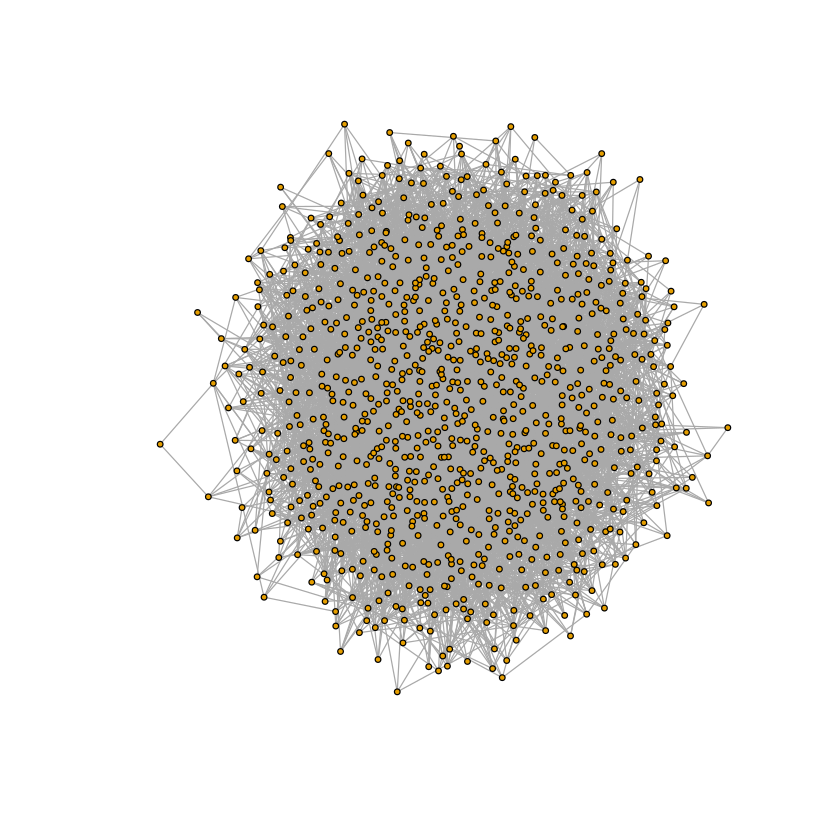

In [0]:
# build and plot the random graph with 1000 nodes and probability p = 0.01
graph1 <- erdos.renyi.game(1000,0.01,directed = F)
plot(graph1,vertex.size = 2, vertex.label = "")

## (b)

In [0]:
# function to get the normalized transition matrix
get_trans_mat = function(graph)
{
  vert = V(graph)
  num = vcount(graph)
  adj = as_adjacency_matrix(graph)
  adj[diag(rowSums(adj)==0)]=1 # in case that some nodes are isolated for the given graph, so creating self-edges
  trans_mat = adj/repmat(matrix(rowSums(adj,,1)),1,num)
  return(trans_mat)
}

In [0]:
# function to get the random walk destination
rand_dest = function(graph,start,steps,trans_mat)
{
  v = start
  for(i in 1:steps)
  {
    pmf = trans_mat[v,]
    v = sample(1:vcount(graph),1,prob = pmf)
  }
  return(v)
}

In [0]:
# do the random walk for at most 100 steps
s_t = numeric()
var_t = numeric()
paths = shortest.paths(graph1)
mat = get_trans_mat(graph1)
for (t in 1:100)
{
  temp = numeric()
  for (s in 1:1000)
  {
    v = rand_dest(graph1,s,t,mat)
    temp = c(temp,paths[s,v])
  } 
  s_t = c(s_t,mean(temp))
  var_t = c(var_t,var(temp))
}

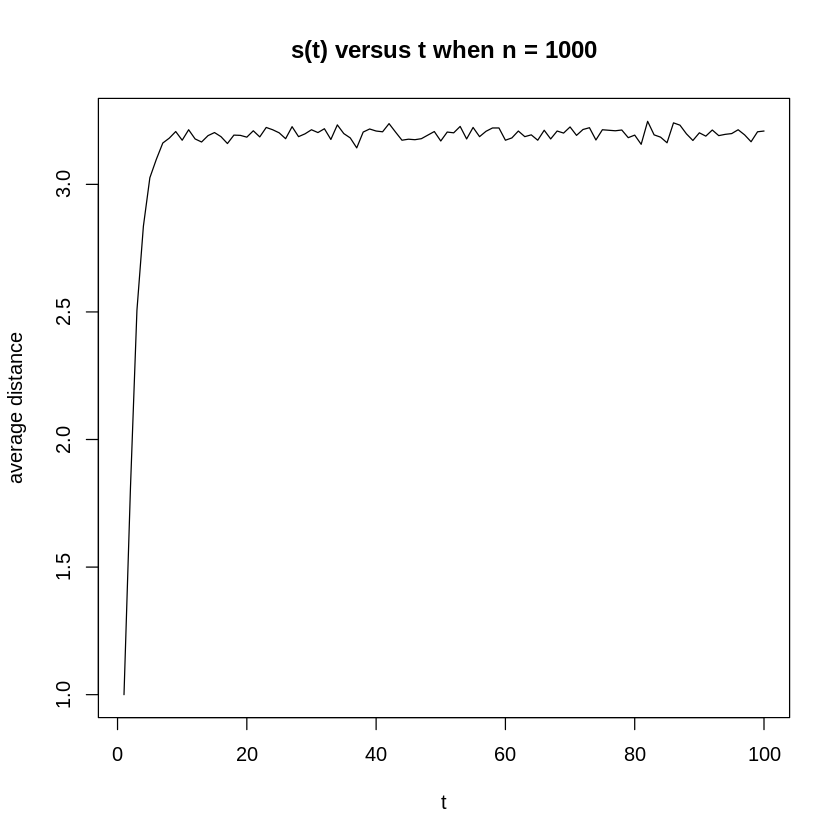

In [0]:
plot(1:100,s_t,typ="l",main="s(t) versus t when n = 1000",xlab="t",ylab="average distance")

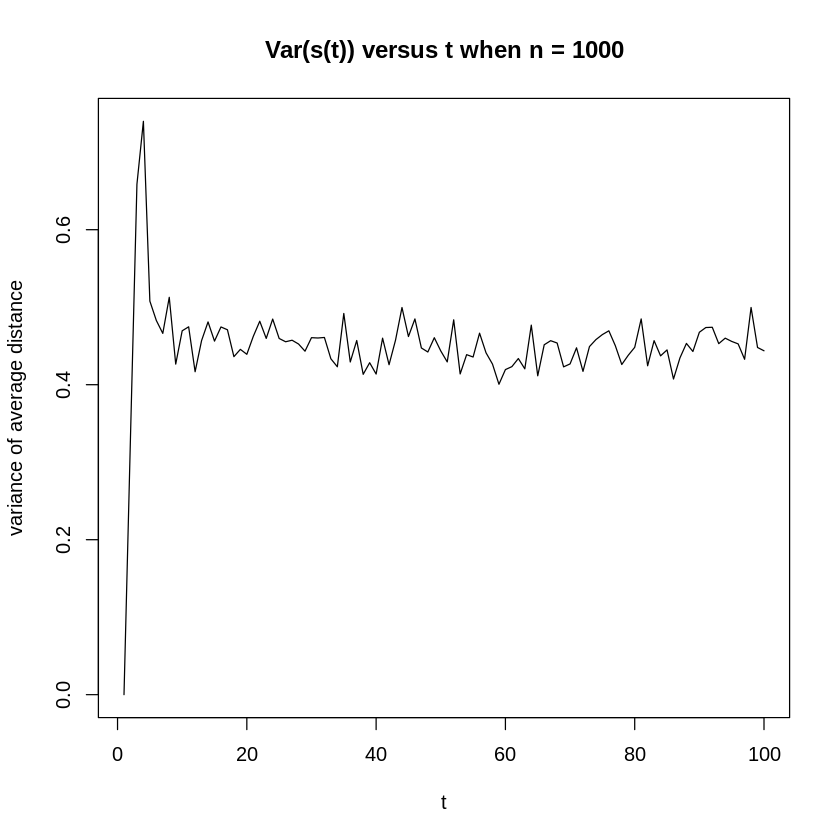

In [0]:
plot(1:100,var_t,typ="l",main="Var(s(t)) versus t when n = 1000",xlab="t",ylab="variance of average distance")

##(c)

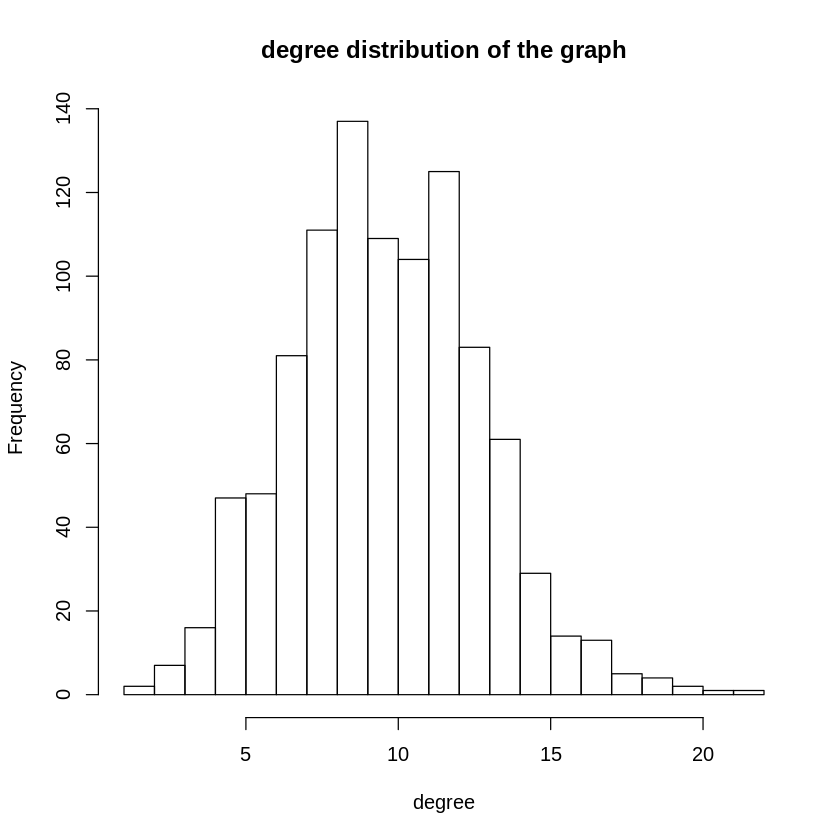

In [0]:
# original degree distribution
hist(degree(graph1),1:max(degree(graph1)),main = "degree distribution of the graph",xlab = "degree")

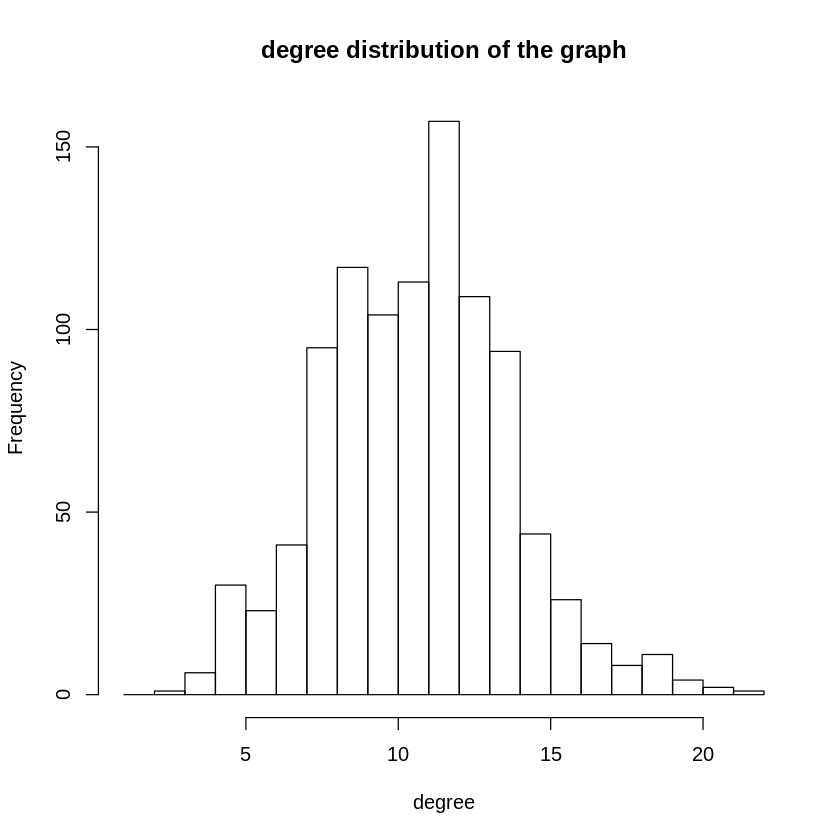

In [0]:
# random walk nodes' degree distribution-
degrees = numeric()
for (s in 1:1000)
{
  v = rand_dest(graph1,s,100,mat)
  degrees = c(degrees,degree(graph1,v))
} 
hist(degrees,1:max(degrees),main = "degree distribution of the graph",xlab = "degree")

## (d)

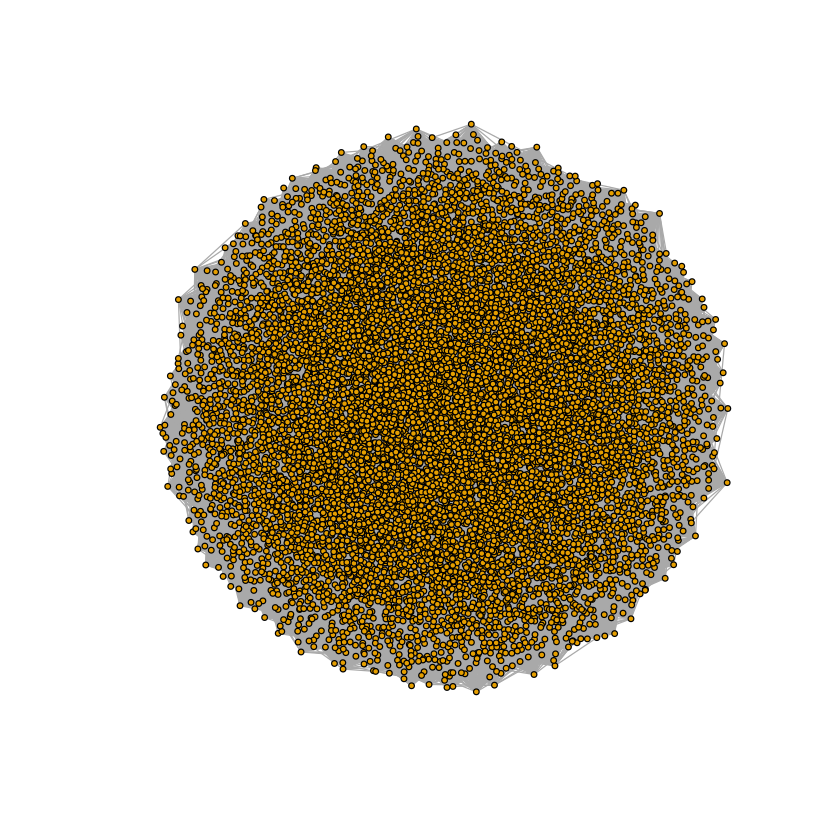

In [0]:
# build and plot the random graph with 10000 nodes and probability p = 0.01, only choose 100 samples to start with due to the huge size of network
graph2 <- erdos.renyi.game(10000,0.01,directed = F)
plot(graph2,vertex.size = 2,vertex.label = "")
# do the random walk for at most 30 steps
s_t = numeric()
var_t = numeric()
paths = shortest.paths(graph2)
mat = get_trans_mat(graph2)
for (t in 1:100)
{
  temp = numeric()
  for (s in 1:30)
  {
    v = rand_dest(graph2,s,t,mat)
    temp = c(temp,paths[s,v])
  } 
  s_t = c(s_t,mean(temp))
  var_t = c(var_t,var(temp))
}

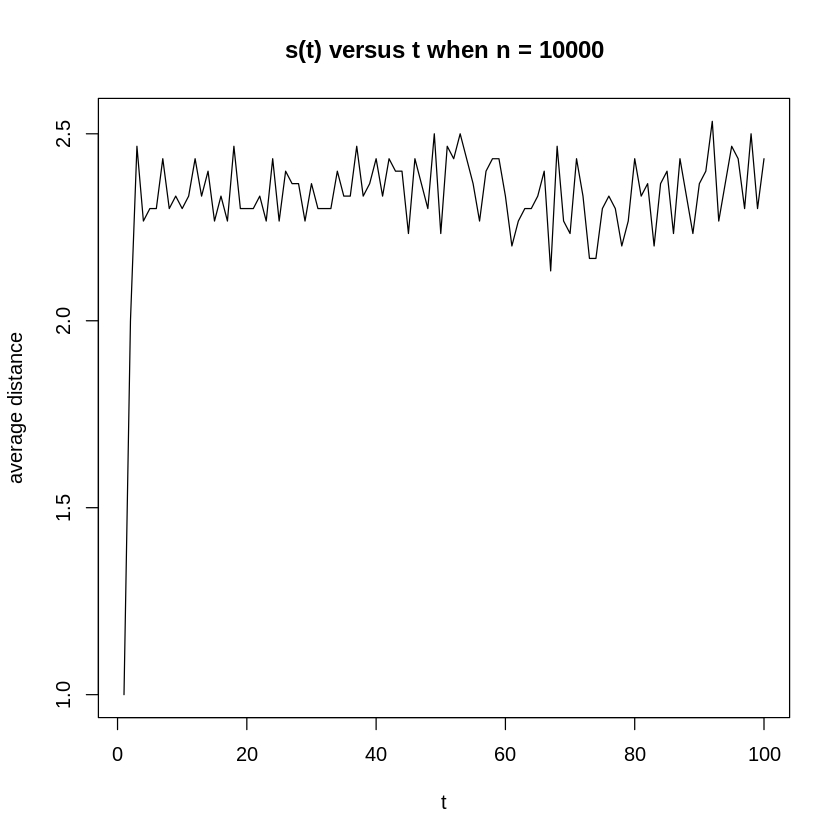

In [0]:
plot(1:100,s_t,typ="l",main="s(t) versus t when n = 10000",xlab="t",ylab="average distance")

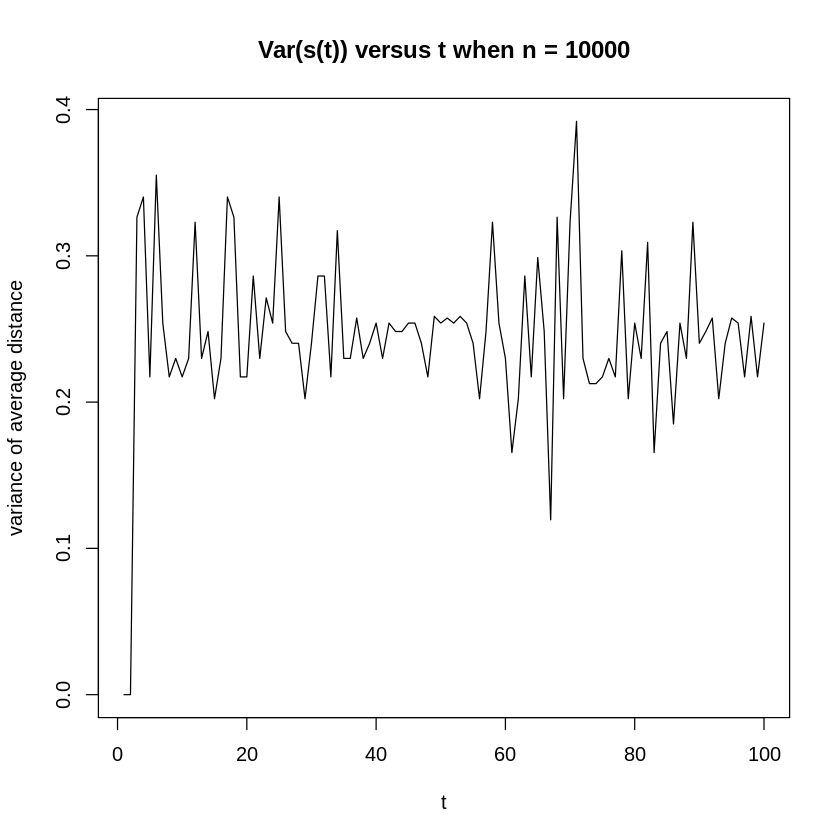

In [0]:
plot(1:100,var_t,typ="l",main="Var(s(t)) versus t when n = 10000",xlab="t",ylab="variance of average distance")

#2

##(a)

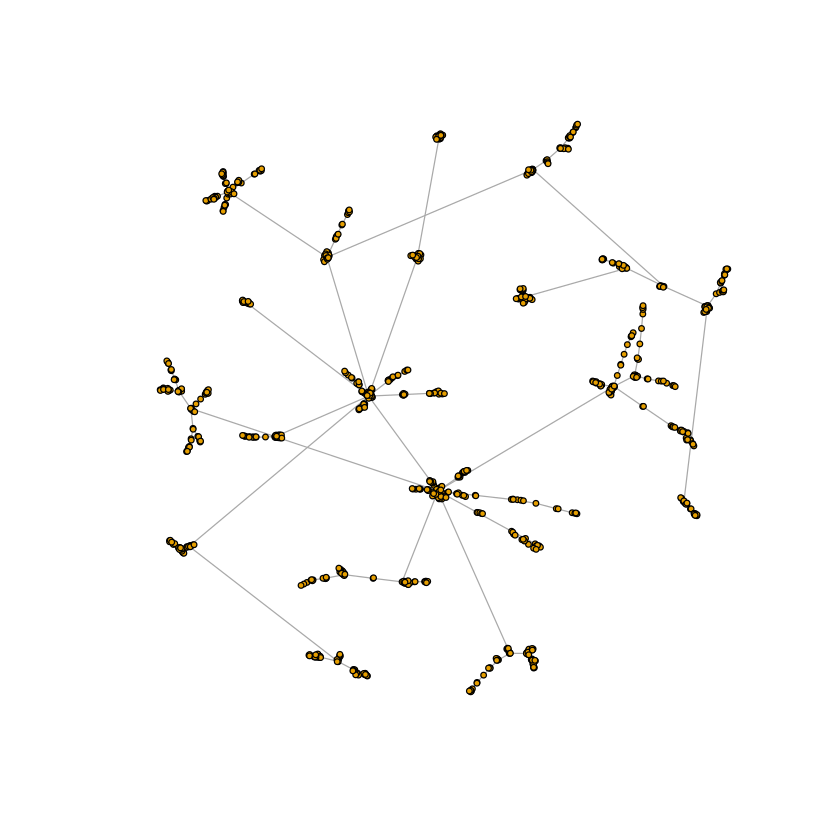

In [0]:
# build and plot the undirected preferential attachment network graph with 1000 nodes and m = 1
graph1 <- barabasi.game(1000, m=1, directed=F)
plot(graph1,vertex.size = 2, vertex.label = "")

##(b)

In [0]:
# do the random walk for at most 100 steps
s_t = numeric()
var_t = numeric()
paths = shortest.paths(graph1)
mat = get_trans_mat(graph1)
for (t in 1:100)
{
  temp = numeric()
  for (s in 1:1000)
  {
    v = rand_dest(graph1,s,t,mat)
    temp = c(temp,paths[s,v])
  } 
  s_t = c(s_t,mean(temp))
  var_t = c(var_t,var(temp))
}

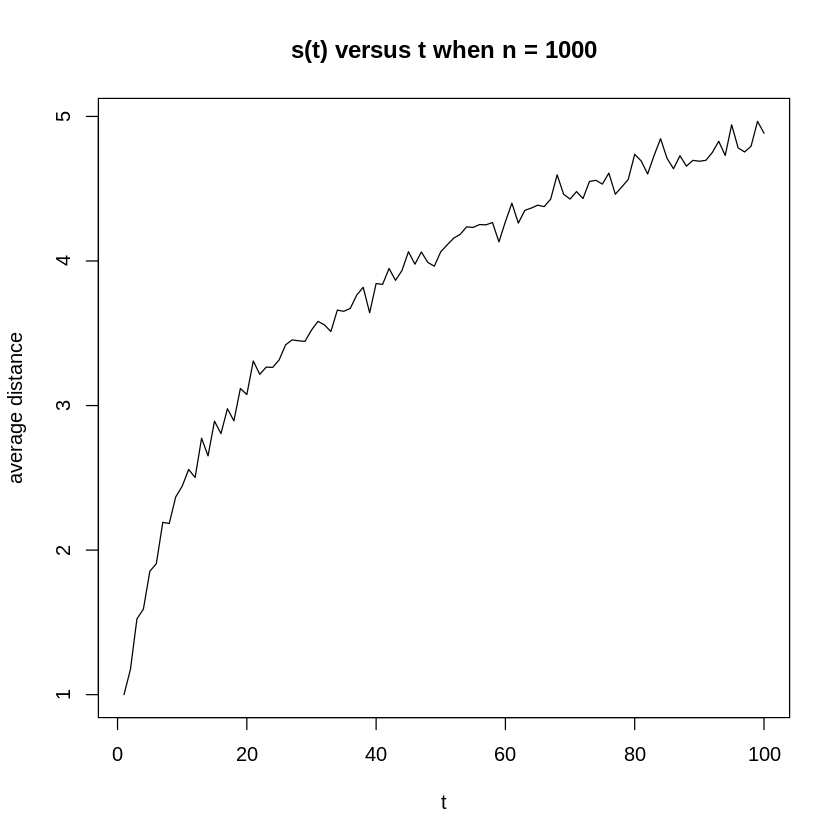

In [0]:
plot(1:100,s_t,typ="l",main="s(t) versus t when n = 1000",xlab="t",ylab="average distance")

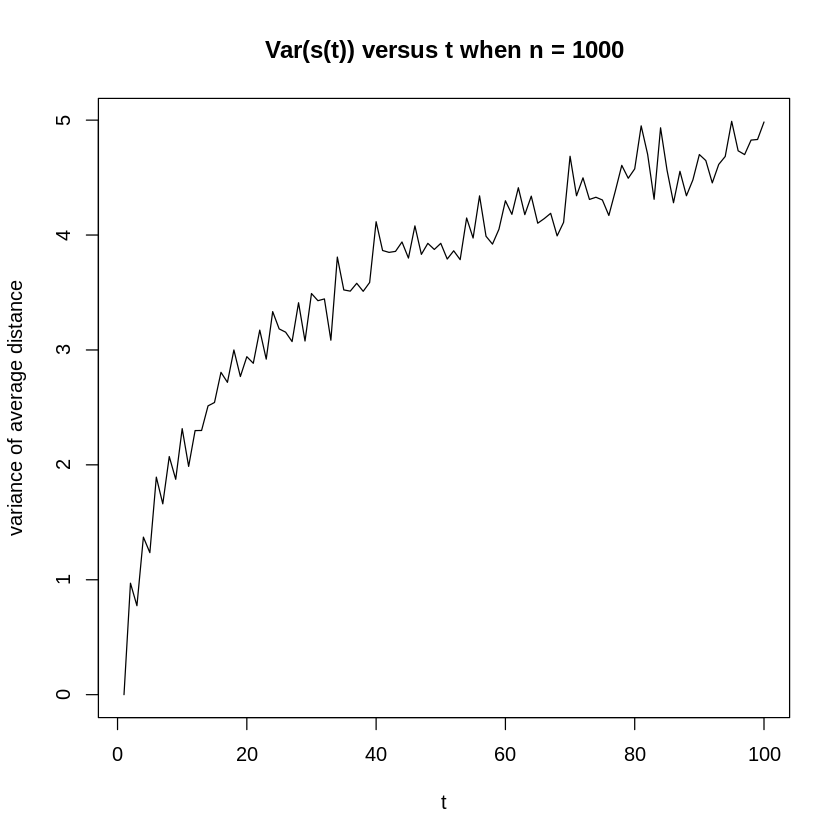

In [0]:
plot(1:100,var_t,typ="l",main="Var(s(t)) versus t when n = 1000",xlab="t",ylab="variance of average distance")

##(c)

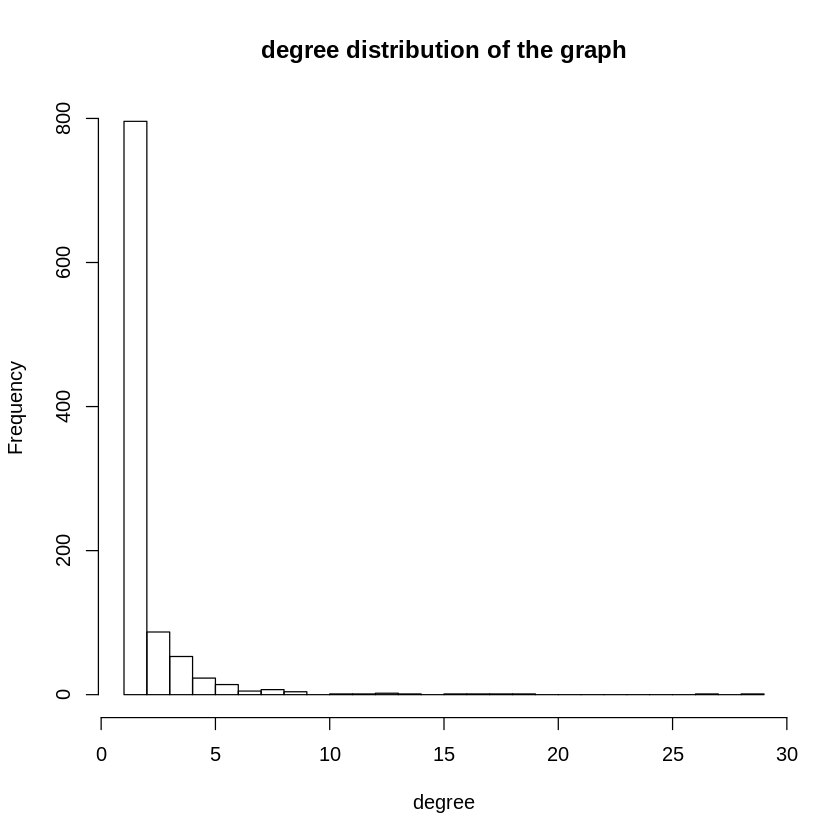

In [0]:
# original degree distribution
hist(degree(graph1),1:max(degree(graph1)),main = "degree distribution of the graph",xlab = "degree")

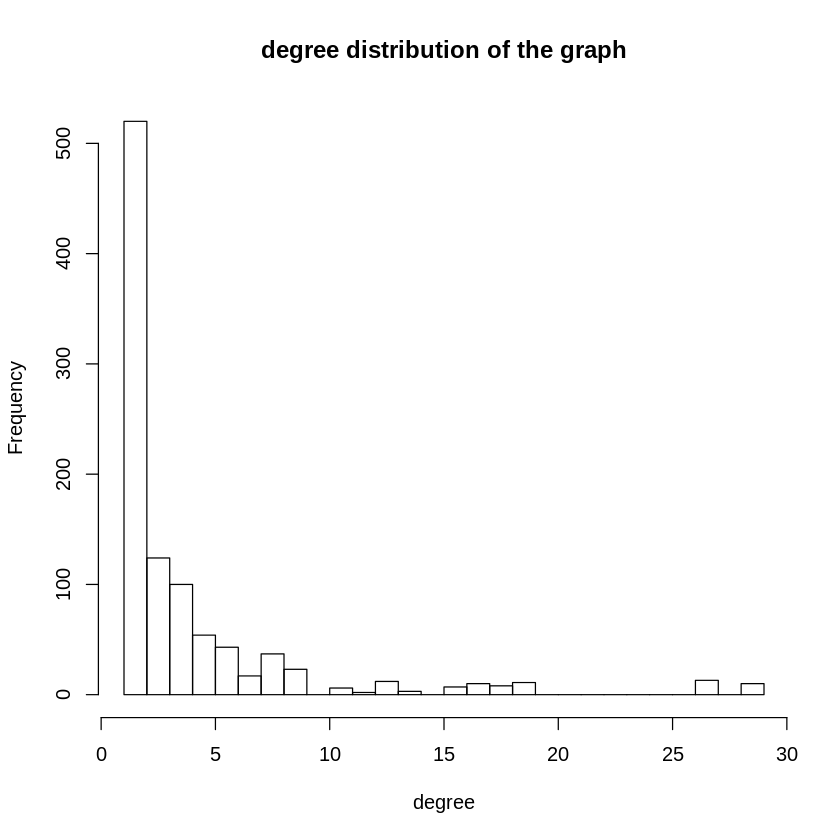

In [0]:
# random walk nodes' degree distribution-
degrees = numeric()
for (s in 1:1000)
{
  v = rand_dest(graph1,s,100,mat)
  degrees = c(degrees,degree(graph1,v))
} 
hist(degrees,1:max(degrees),main = "degree distribution of the graph",xlab = "degree")

##(d)

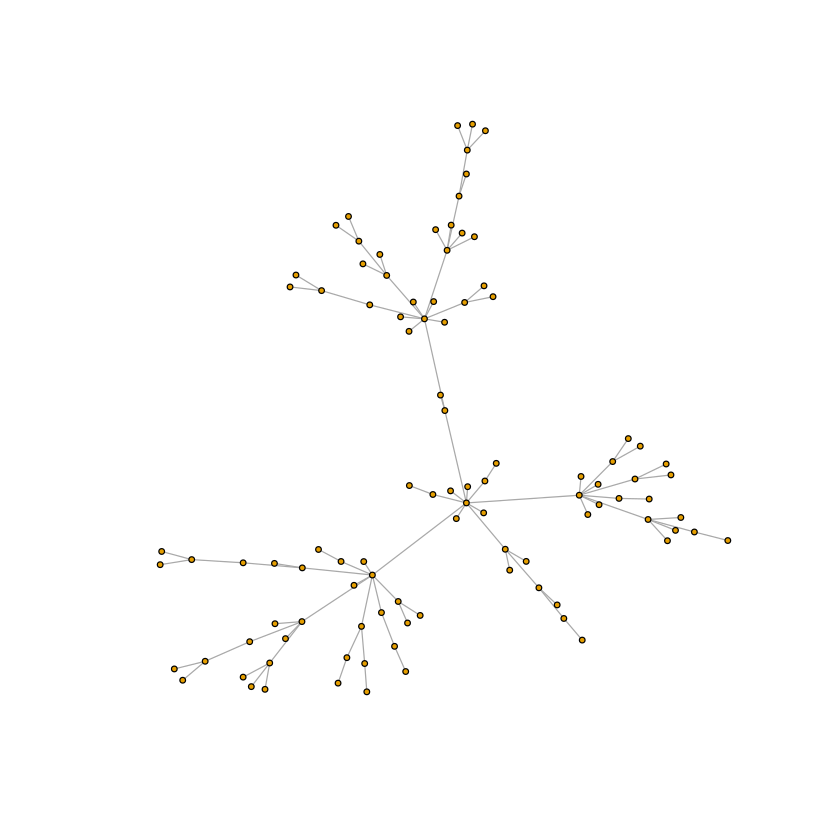

In [0]:
# build and plot the undirected preferential attachment network graph with 100 nodes and m = 1
graph2 <- barabasi.game(100, m=1, directed=F)
plot(graph2,vertex.size = 2, vertex.label = "")
# do the random walk for at most 100 steps
s_t = numeric()
var_t = numeric()
paths = shortest.paths(graph2)
mat = get_trans_mat(graph2)
for (t in 1:100)
{
  temp = numeric()
  for (s in 1:100)
  {
    v = rand_dest(graph2,s,t,mat)
    temp = c(temp,paths[s,v])
  } 
  s_t = c(s_t,mean(temp))
  var_t = c(var_t,var(temp))
}

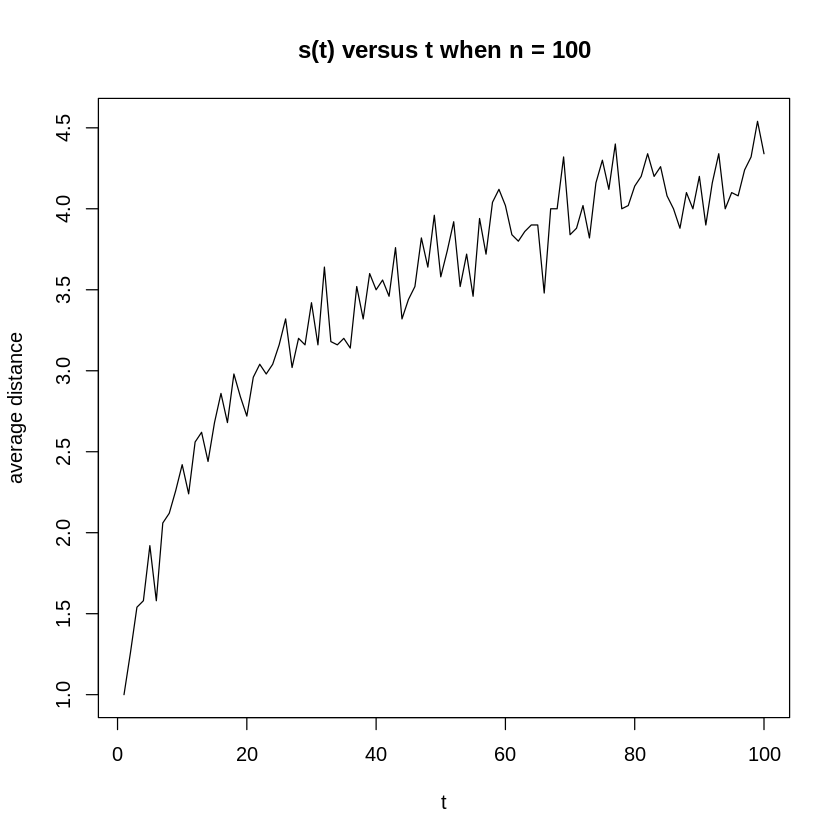

In [0]:
plot(1:100,s_t,typ="l",main="s(t) versus t when n = 100",xlab="t",ylab="average distance")

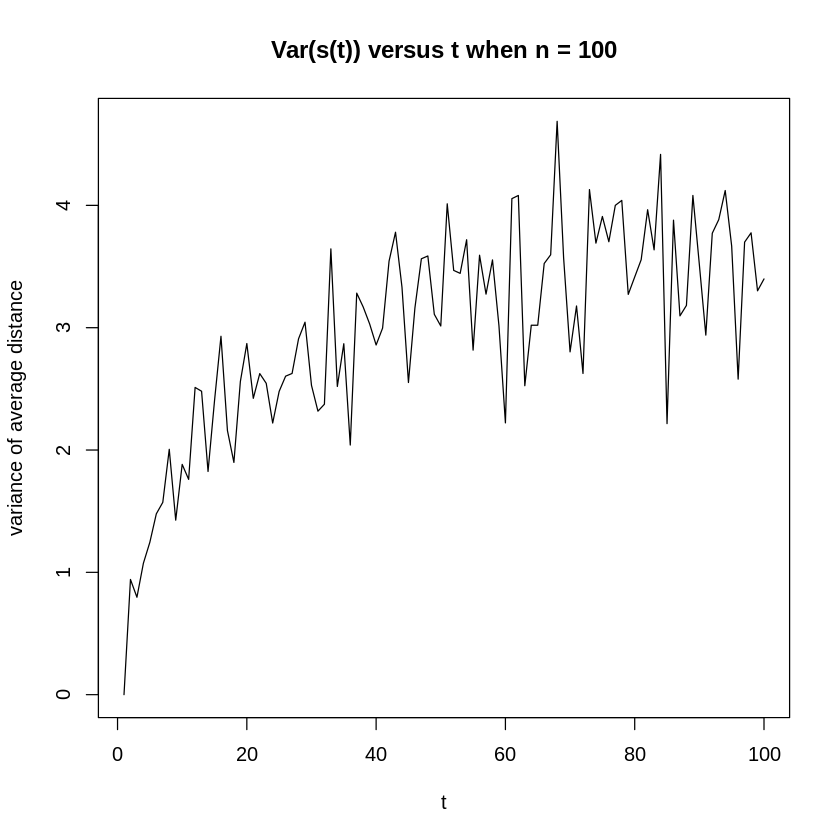

In [0]:
plot(1:100,var_t,typ="l",main="Var(s(t)) versus t when n = 100",xlab="t",ylab="variance of average distance")

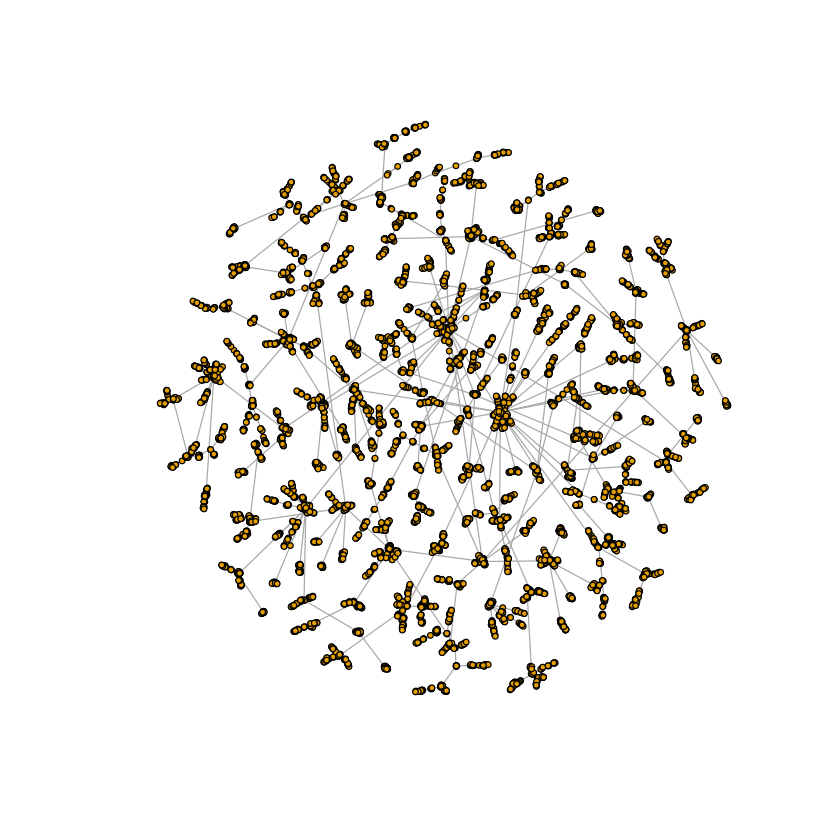

In [0]:
# build and plot the undirected preferential attachment network graph with 10000 nodes and m = 1,, only choose 100 samples to start with due to the huge size of network
graph3 <- barabasi.game(10000, m=1, directed=F)
plot(graph3,vertex.size = 2, vertex.label = "")
# do the random walk for at most 100 steps
s_t = numeric()
var_t = numeric()
paths = shortest.paths(graph3)
mat = get_trans_mat(graph3)
for (t in 1:100)
{
  temp = numeric()
  for (s in 1:100)
  {
    v = rand_dest(graph3,s,t,mat)
    temp = c(temp,paths[s,v])
  } 
  s_t = c(s_t,mean(temp))
  var_t = c(var_t,var(temp))
}

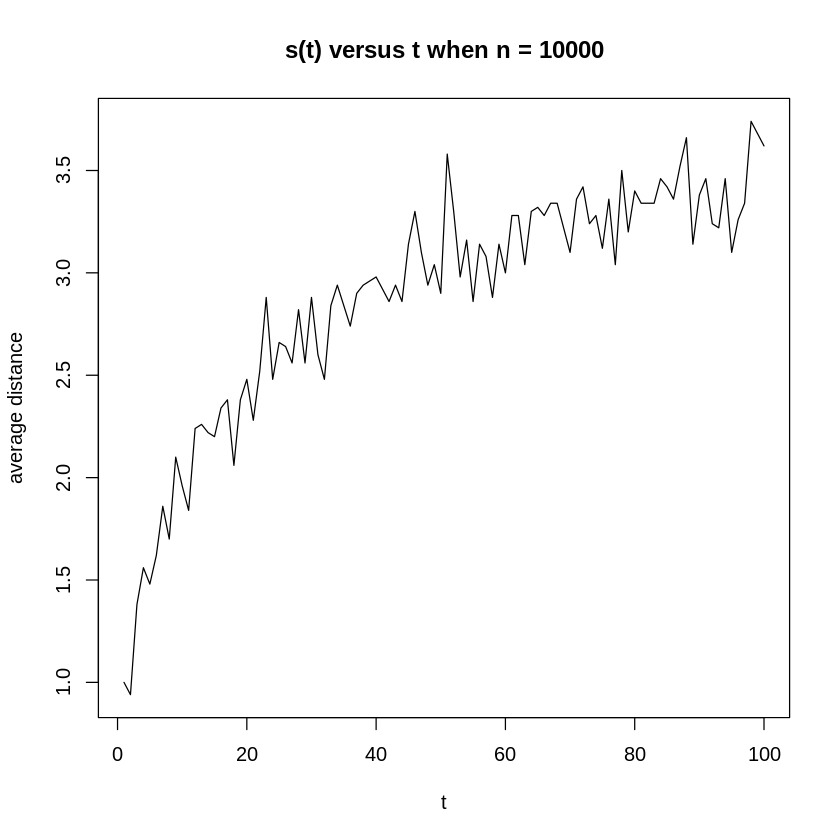

In [0]:
plot(1:100,s_t,typ="l",main="s(t) versus t when n = 10000",xlab="t",ylab="average distance")

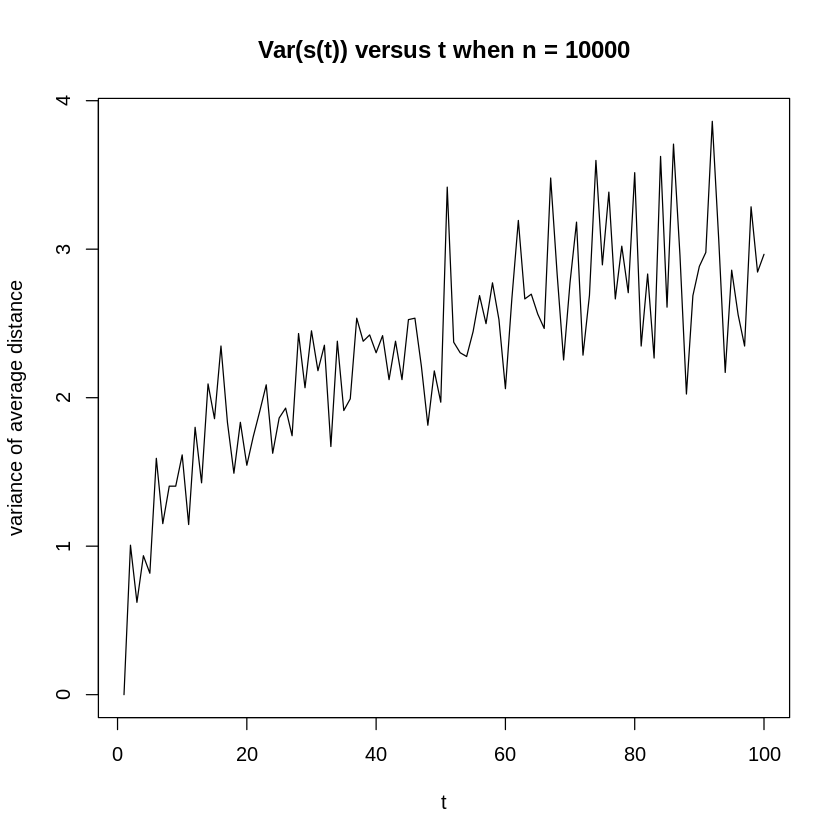

In [0]:
plot(1:100,var_t,typ="l",main="Var(s(t)) versus t when n = 10000",xlab="t",ylab="variance of average distance")

#3

##(a)

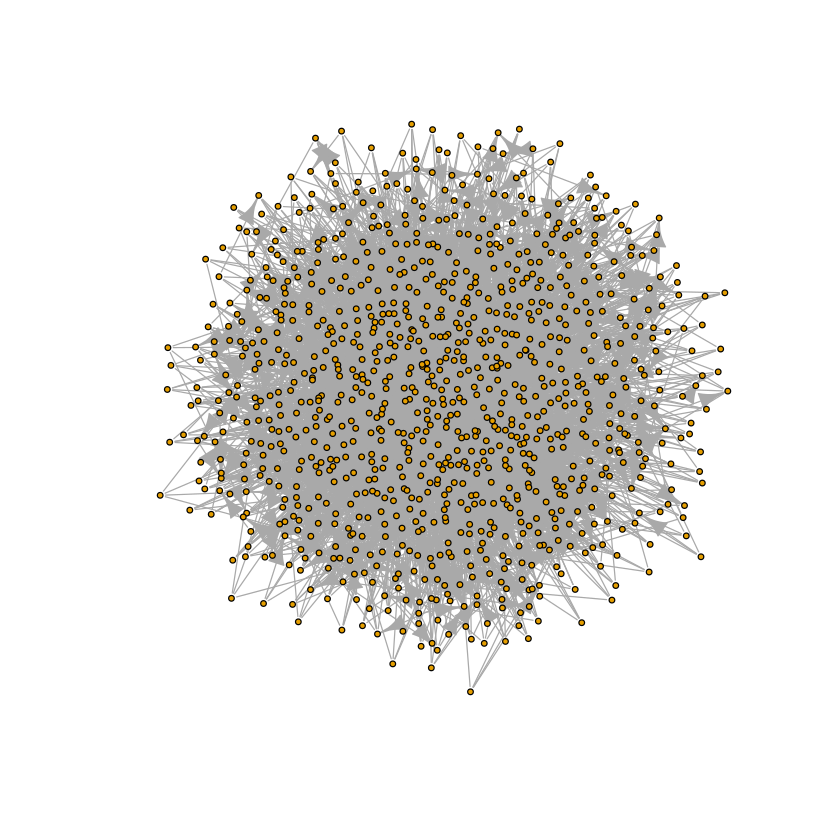

In [0]:
# build and plot the directed preferential attachment network graph with 1000 nodes and m = 4
graph1 <- barabasi.game(1000, m=4, directed=T)
plot(graph1,vertex.size = 2, vertex.label = "")

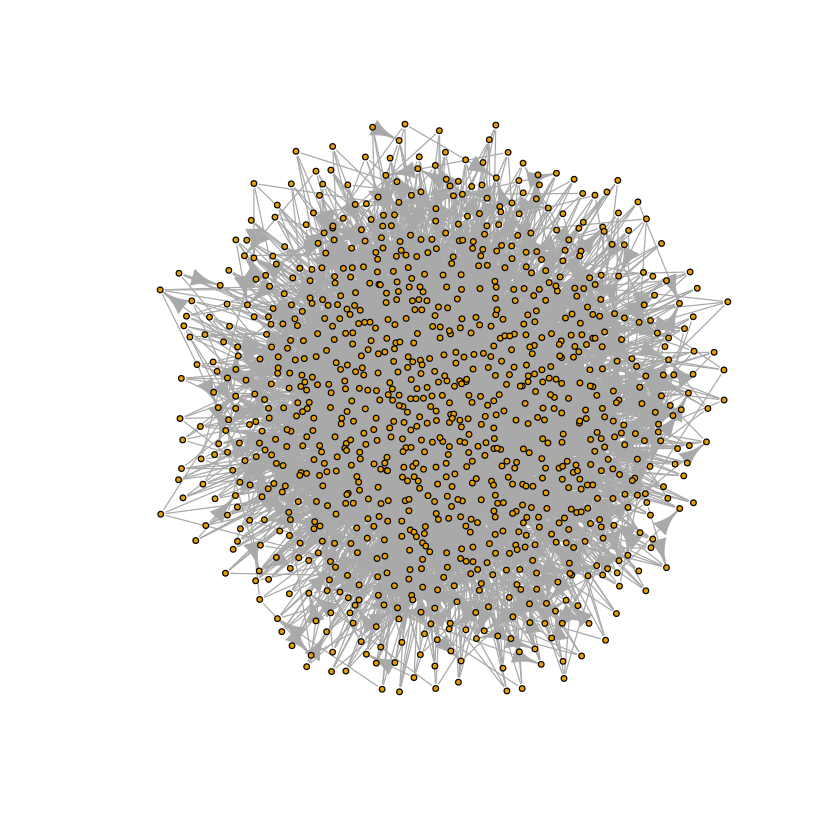

In [0]:
# build another with same parameter
graph2 <- barabasi.game(1000, m=4, directed=T)
plot(graph2,vertex.size = 2, vertex.label = "")

In [0]:
# get the list and shuffle
new_order = sample(1000)
newlist = as_edgelist(permute(graph2,new_order))

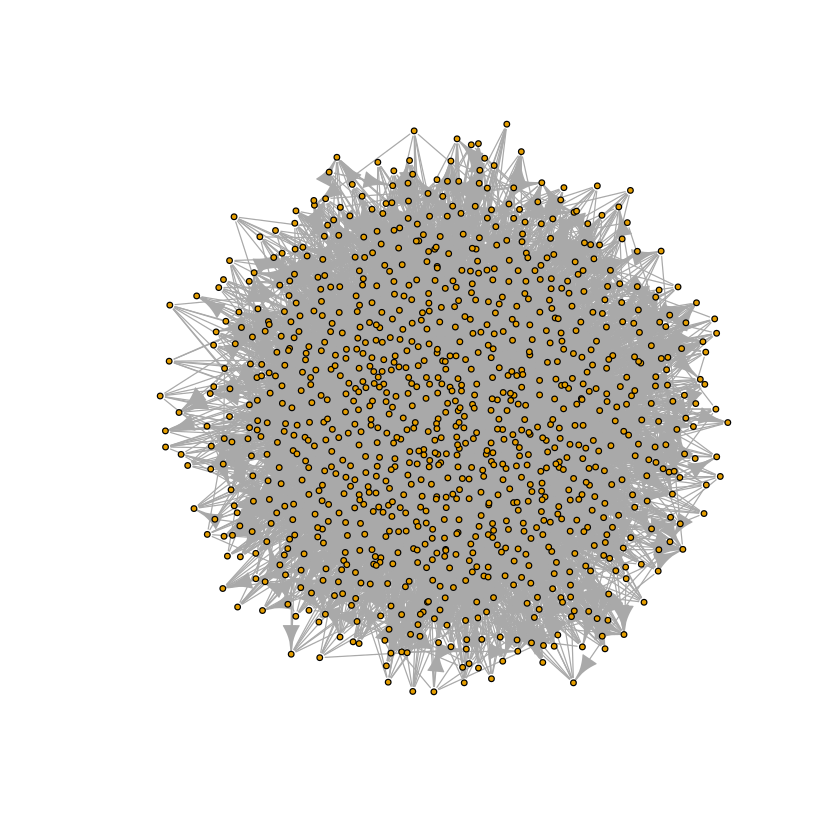

In [0]:
# add the list of edges to the first graph
graph3 = add_edges(graph1,as.vector(t(newlist)))

# plot the final graph
plot(graph3,vertex.size = 2, vertex.label = "")

In [0]:
# function to random walk with teleportation
rand_walk = function(graph,start,steps,alpha,trans_mat)
{
  p = rep(1/vcount(graph),vcount(graph))
  v = start
  for(i in 1:steps)
  {
    if(runif(1)>alpha)
    {
      pmf = trans_mat[v,]
      v = sample(1:vcount(graph),1,prob = pmf)
    }
    else
    {
      v = sample(1:vcount(graph),1,prob = p)
    }
  }
  return(v)
}

In [0]:
# calculate the visit probability by simulation
mat = get_trans_mat(graph3)
visit_times = rep(0,1000)
for(i in 1:3)
{
  for(s in 1:1000)
  {
    dest = rand_dest(graph3,s,49+i,mat)
    visit_times[dest] = visit_times[dest]+1
  }
}
visit_prob = visit_times/3000

[1] 0.8675534


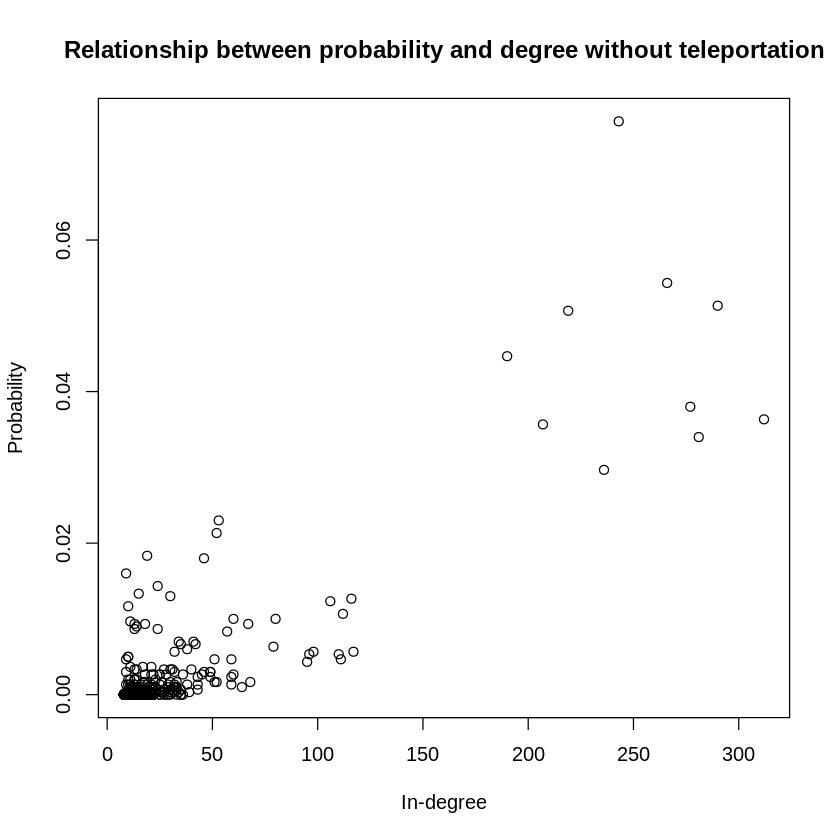

In [0]:
plot(degree(graph3,),visit_prob,main="Relationship between probability and degree without teleportation",xlab="In-degree",ylab="Probability",type="p")
cor=cor(degree(graph3),visit_prob) # count the probability correlation
print(cor)

##(b)

In [0]:
# calculate the visit probability by simulation
mat = get_trans_mat(graph3)
visit_times = rep(0,1000)
for(i in 1:3)
{
  for(s in 1:1000)
  {
    dest = rand_walk(graph3,s,49+i,0.15,mat)
    visit_times[dest] = visit_times[dest]+1
  }
}
visit_prob = visit_times/3000

[1] 0.9070502


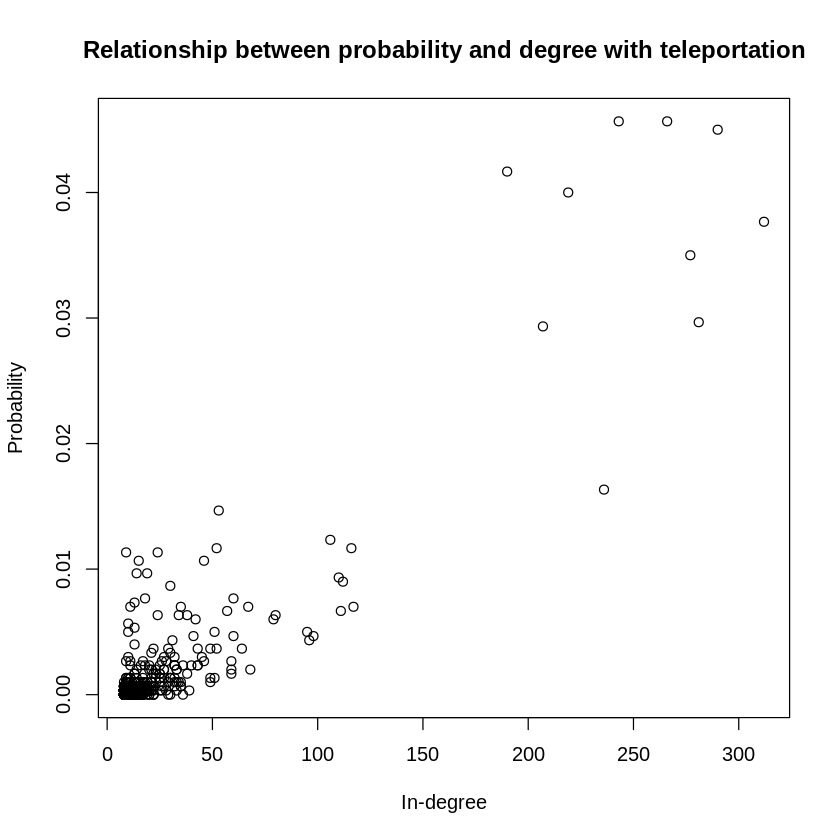

In [0]:
plot(degree(graph3,),visit_prob,main="Relationship between probability and degree with teleportation",xlab="In-degree",ylab="Probability",type="p")
cor=cor(degree(graph3),visit_prob) # count the probability correlation
print(cor)

#4

##(a)

In [0]:
# use the probability distribution from question 3
p = visit_prob

In [0]:
# function of random walk with personalized page rank
rand_person = function(graph,start,steps,alpha,trans_mat)
{
  v = start
  for(i in 1:steps)
  {
    if(runif(1)>alpha)
    {
      pmf = trans_mat[v,]
      v = sample(1:vcount(graph),1,prob = pmf)
    }
    else
    {
      v = sample(1:vcount(graph),1,prob = p)
    }
  }
  return(v)
}

In [0]:
# calculate the visit probability by simulation
mat = get_trans_mat(graph3)
visit_times = rep(0,1000)
for(i in 1:3)
{
  for(s in 1:1000)
  {
    dest = rand_person(graph3,s,49+i,0.15,mat)
    visit_times[dest] = visit_times[dest]+1
  }
}
visit_prob = visit_times/3000

[1] 0.8668288


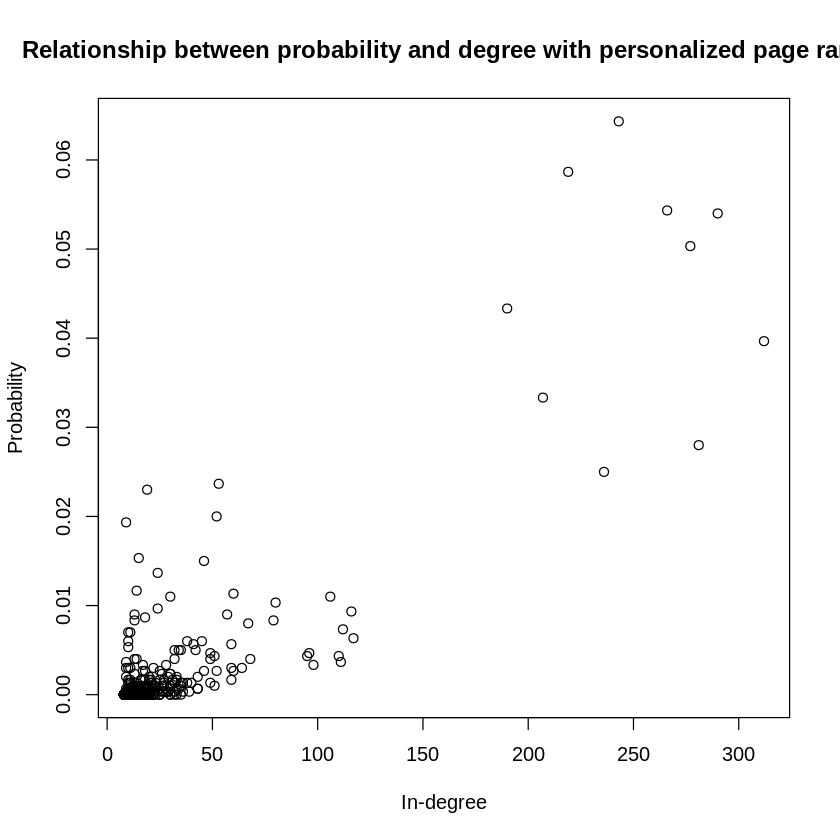

In [0]:
plot(degree(graph3,),visit_prob,main="Relationship between probability and degree with personalized page rank",xlab="In-degree",ylab="Probability",type="p")
cor=cor(degree(graph3),visit_prob) # count the probability correlation
print(cor)

##(b)

In [0]:
# find two median pagerank nodes
med = sort(p)[c(length(p)/2,length(p)/2+1)]
medians = c(which(p==med[1]),which(p==med[2]))
nodes = sample(medians,2)

In [0]:
# assign new probability
p = rep(0,vcount(graph3))
p[nodes[1]]=0.5
p[nodes[2]]=0.5

In [0]:
# calculate the visit probability by simulation
mat = get_trans_mat(graph3)
visit_times = rep(0,1000)
for(i in 1:3)
{
  for(s in 1:1000)
  {
    dest = rand_person(graph3,s,49+i,0.15,mat)
    visit_times[dest] = visit_times[dest]+1
  }
}
visit_prob = visit_times/3000

[1] 0.6713628


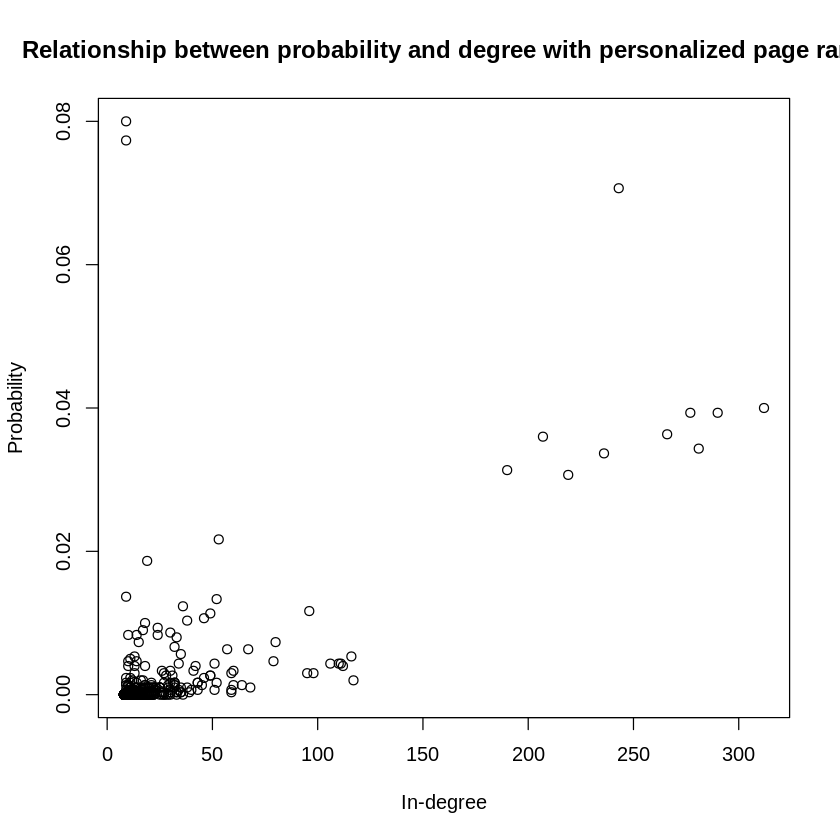

In [0]:
plot(degree(graph3,),visit_prob,main="Relationship between probability and degree with personalized page rank",xlab="In-degree",ylab="Probability",type="p")
cor=cor(degree(graph3),visit_prob) # count the probability correlation
print(cor)